In [62]:
import numpy as np
from nilearn import datasets, plotting
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.interfaces.fmriprep import load_confounds
import matplotlib.pyplot as plt


In [26]:
# Load Schaefer atlas
atlas_data = datasets.fetch_atlas_schaefer_2018(n_rois=800)
atlas_filename = atlas_data.maps

# Load fMRI data
data = datasets.fetch_development_fmri(n_subjects=1)
fmri_filenames = data.func[0]

# Define the masker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True, verbose=5, reduced_confounds=False)

 

 ...done. (1 seconds, 0 min)


 ...done. (0 seconds, 0 min)


In [27]:
type(masker)


nilearn.maskers.nifti_labels_masker.NiftiLabelsMasker

In [64]:
# Confound 1: Global Signal Regression
confounds_gsr = load_confounds(fmri_filenames,
                                strategy=['global_signal',"high_pass", "wm_csf"])
# Confound 2: Motion Parameters
confounds_motion = load_confounds(fmri_filenames,strategy=['motion',"high_pass", "wm_csf"], motion= "basic", compcor='anat_combined',n_compcor='all')



In [73]:

time_series_gsr = masker.fit_transform(fmri_filenames, confounds=confounds_gsr[0])
time_series_motion = masker.fit_transform(fmri_filenames, confounds=confounds_motion[0])



[NiftiLabelsMasker.wrapped] loading data from C:\Users\prsyu\nilearn_data\schaefer_2018\Schaefer2018_800Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from C:\Users\prsyu\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.wrapped] loading data from C:\Users\prsyu\nilearn_data\schaefer_2018\Schaefer2018_800Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from C:\Users\prsyu\nilearn_data\development_fmri\development_fmri\sub-pixar123_task-pixar_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals


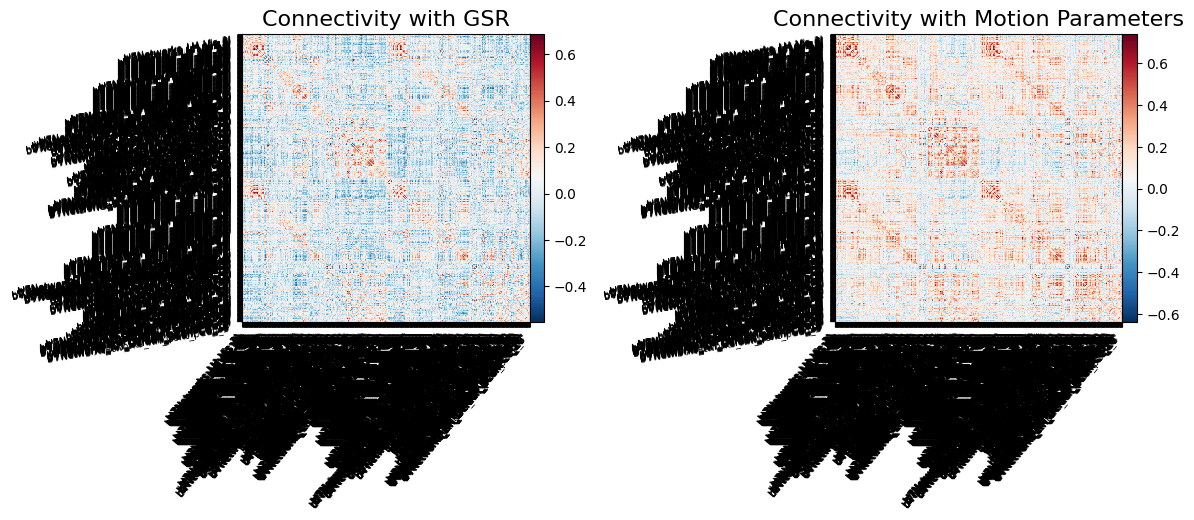

In [74]:
# Calculate connectivity matrices
connectivity_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix_gsr = connectivity_measure.fit_transform([time_series_gsr])[0]
correlation_matrix_motion = connectivity_measure.fit_transform([time_series_motion])[0]

# Zero out the diagonals
np.fill_diagonal(correlation_matrix_gsr, 0)
np.fill_diagonal(correlation_matrix_motion, 0)

# Plotting the correlation matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
plotting.plot_matrix(correlation_matrix_gsr, labels=atlas_data.labels, title='Connectivity with GSR', axes=axes[0])
plotting.plot_matrix(correlation_matrix_motion, labels=atlas_data.labels, title='Connectivity with Motion Parameters', axes=axes[1])
plt.show()